In [1]:
import pandas as pd
import matplotlib.pyplot as plt

1. csv 폴더에 있는 drinks.csv 파일을 로드
2. 데이터프레임에 결측치자 존재하는가?
3. 컬럼의 이름 변경: 국가, 맥주소비량, 위스키소비량, 와인소비량, 순수알코올, 대륙
4. 대륙 컬럼에 결측치 존재 -> 결측치를 "OT"로 대체
5. 파생변수 생성
    - 총술소비량: 맥주소비량+위스키소비량+와인소비량
    - 도수: (순수알코올/총술소비량)*100 -> 반올림해서 2자리
6. 어떤 대륙이 도수가 가장 높은 술을 마시는가?

In [2]:
drinks=pd.read_csv("csv/drinks.csv")

In [12]:
drinks.isna().sum()
# case2: drinks.info()
# case3: drinks.isna().any() : 결측치가 있는 컬럼은 어디인가? 있으면 True

국가         0
맥주소비량      0
위스키소비량     0
와인소비량      0
순수알코올      0
대륙        23
dtype: int64

In [5]:
drinks.columns=["국가","맥주소비량","위스키소비량","와인소비량","순수알코올","대륙"]

In [7]:
drinks.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [14]:
drinks["대륙"].fillna("OT", inplace=True)

In [16]:
drinks.isna().any()
# 대륙의 결측치가 채워짐

국가        False
맥주소비량     False
위스키소비량    False
와인소비량     False
순수알코올     False
대륙        False
dtype: bool

In [18]:
drinks["총술소비량"]=drinks["맥주소비량"]+drinks["위스키소비량"]+drinks["와인소비량"]

In [21]:
# sum() 함수 활용
# 인덱스는 전체, 맥주소비량 컬럼부터 와인소비량 컬럼까지, 컬럼을 기준으로 sum
drinks["총술소비량2"]=drinks.loc[:,"맥주소비량":"와인소비량"].sum(axis=1)

In [20]:
drinks.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙,총술소비량,총술소비량2
0,Afghanistan,0,0,0,0.0,AS,0,0
1,Albania,89,132,54,4.9,EU,275,275
2,Algeria,25,0,14,0.7,AF,39,39
3,Andorra,245,138,312,12.4,EU,695,695
4,Angola,217,57,45,5.9,AF,319,319


In [31]:
drinks["도수"]=drinks["순수알코올"]/drinks["총술소비량"]*100

In [32]:
drinks.head()
# 결측치 존재, 2자리까지 반올림

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙,총술소비량,총술소비량2,도수
0,Afghanistan,0,0,0,0.0,AS,0,0,NaN
1,Albania,89,132,54,4.9,EU,275,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,695,1.784173
4,Angola,217,57,45,5.9,AF,319,319,1.849530


In [37]:
ratio=drinks["순수알코올"]/drinks["총술소비량"]*100
drinks["도수"]=round(ratio,2).fillna(0)

In [38]:
drinks.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙,총술소비량,총술소비량2,도수
0,Afghanistan,0,0,0,0.0,AS,0,0,0.00
1,Albania,89,132,54,4.9,EU,275,275,1.78
2,Algeria,25,0,14,0.7,AF,39,39,1.79
3,Andorra,245,138,312,12.4,EU,695,695,1.78
4,Angola,217,57,45,5.9,AF,319,319,1.85


In [51]:
# 대륙 내 여러 국가별 도수의 평균을 구하고, 도수를 기준으로 내림차순 정렬
drinks[["대륙","도수"]].groupby("대륙").mean().sort_values("도수", ascending=False)

,도수
대륙,
AF,4.974528
OT,1.786087
SA,1.785833
EU,1.752667
OC,1.690000
AS,1.635682


- 총술소비량을 기준으로 우리나라는 얼마나 많은 술을 마시고 있는가?
    1. 총술소비량을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거
    3. 국가 컬럼의 데이터가 "South Korea"인 데이터의 인덱스와 총술소비량 데이터 확인
    4. 전체 데이터를 기준으로 막대그래프를 생성, 한국의 색상을 변경, 주석 추가

In [52]:
# 복사본 생성
df=drinks.copy()

In [60]:
df.drop("총술소비량2", axis=1, inplace=True)

In [61]:
df.head()

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙,총술소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,0.00
1,Albania,89,132,54,4.9,EU,275,1.78
2,Algeria,25,0,14,0.7,AF,39,1.79
3,Andorra,245,138,312,12.4,EU,695,1.78
4,Angola,217,57,45,5.9,AF,319,1.85


In [64]:
df.sort_values("총술소비량", ascending=False, inplace=True)

In [67]:
df.reset_index(drop=True, inplace=True)

In [84]:
# 조건식: 국가 컬럼의 데이터가 South Korea와 같다면
flag=df["국가"]=="South Korea"
df.loc[flag]

# case2: df.loc[flag].index[0] -> 인덱스 98만 출력 됨

,국가,맥주소비량,위스키소비량,와인소비량,순수알코올,대륙,총술소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.94


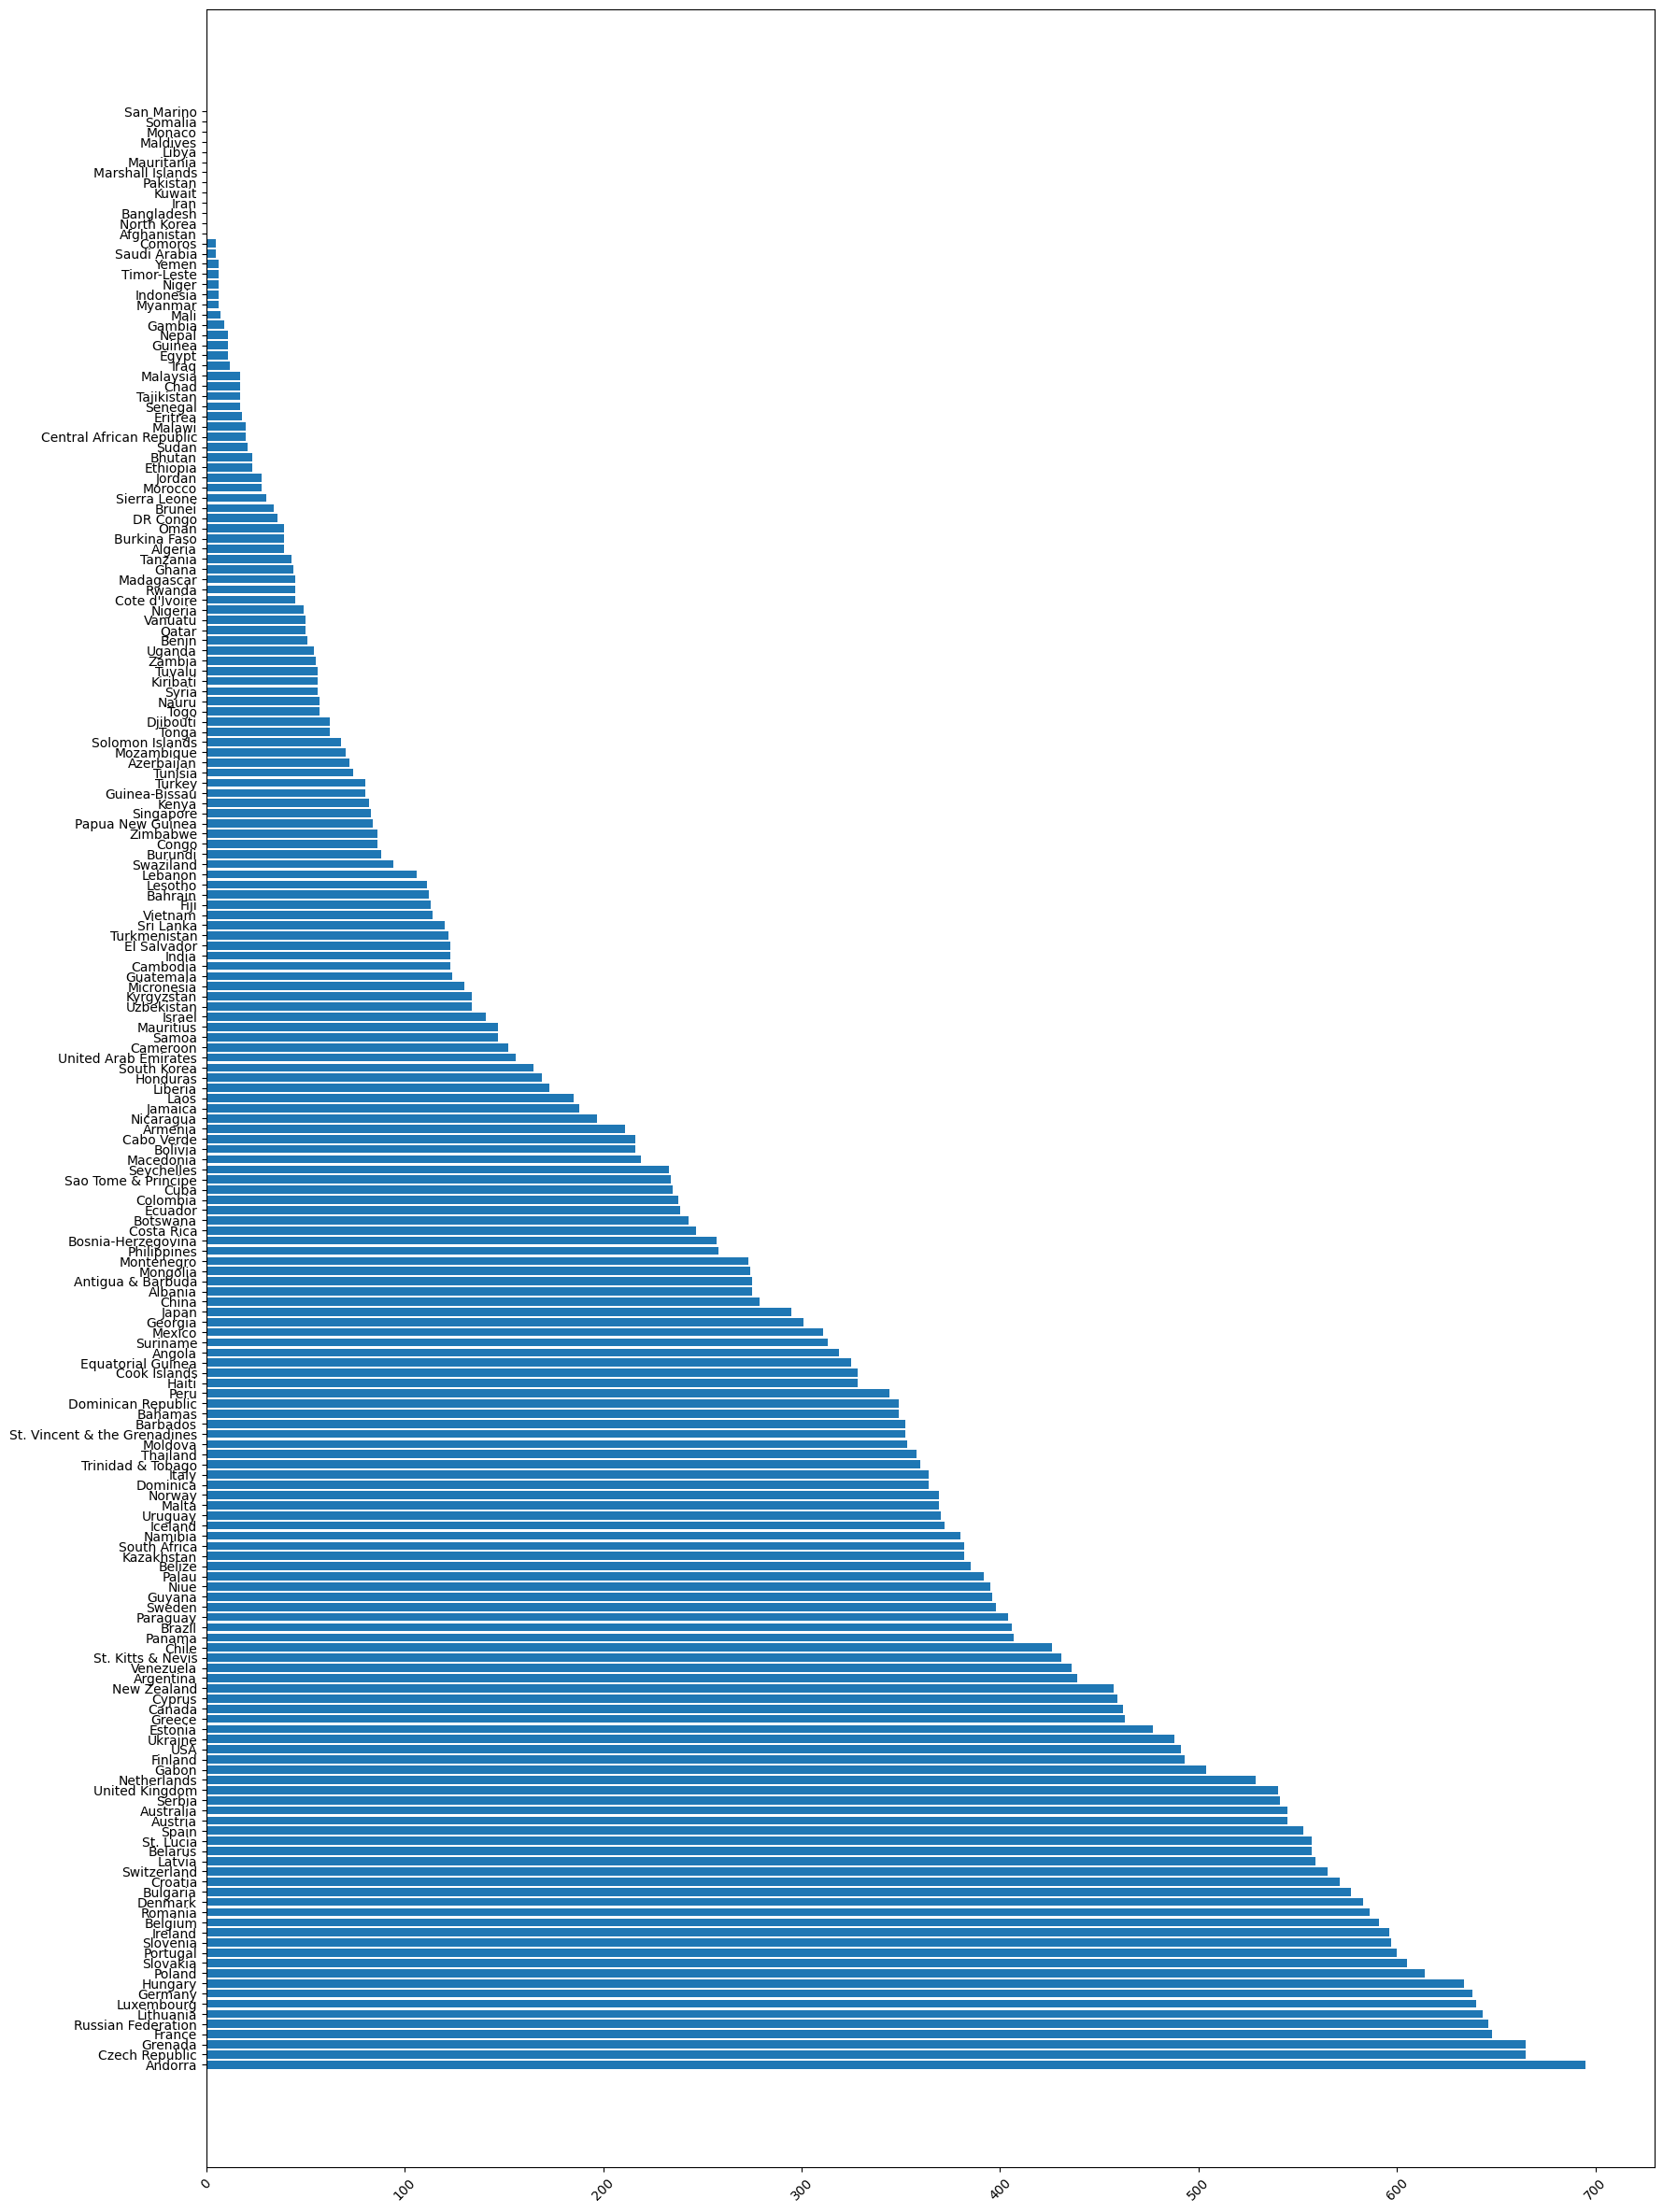

In [90]:
# 그래프 시각화
x=df["국가"]
y=df["총술소비량"]

# 그래프 사이즈 변경
plt.figure(figsize=(20,30))

# 그래프 회전
plt.barh(x, y)

# x축 기울기 설정
plt.xticks(rotation=45)

plt.show()

In [91]:
import platform

In [92]:
plt.rc("font", family="Malgun Gothic")

In [96]:
flag=df["국가"]=="South Korea"
korea_index=df.loc[flag].index[0]
df.loc[korea_index, "총술소비량"]

np.int64(165)

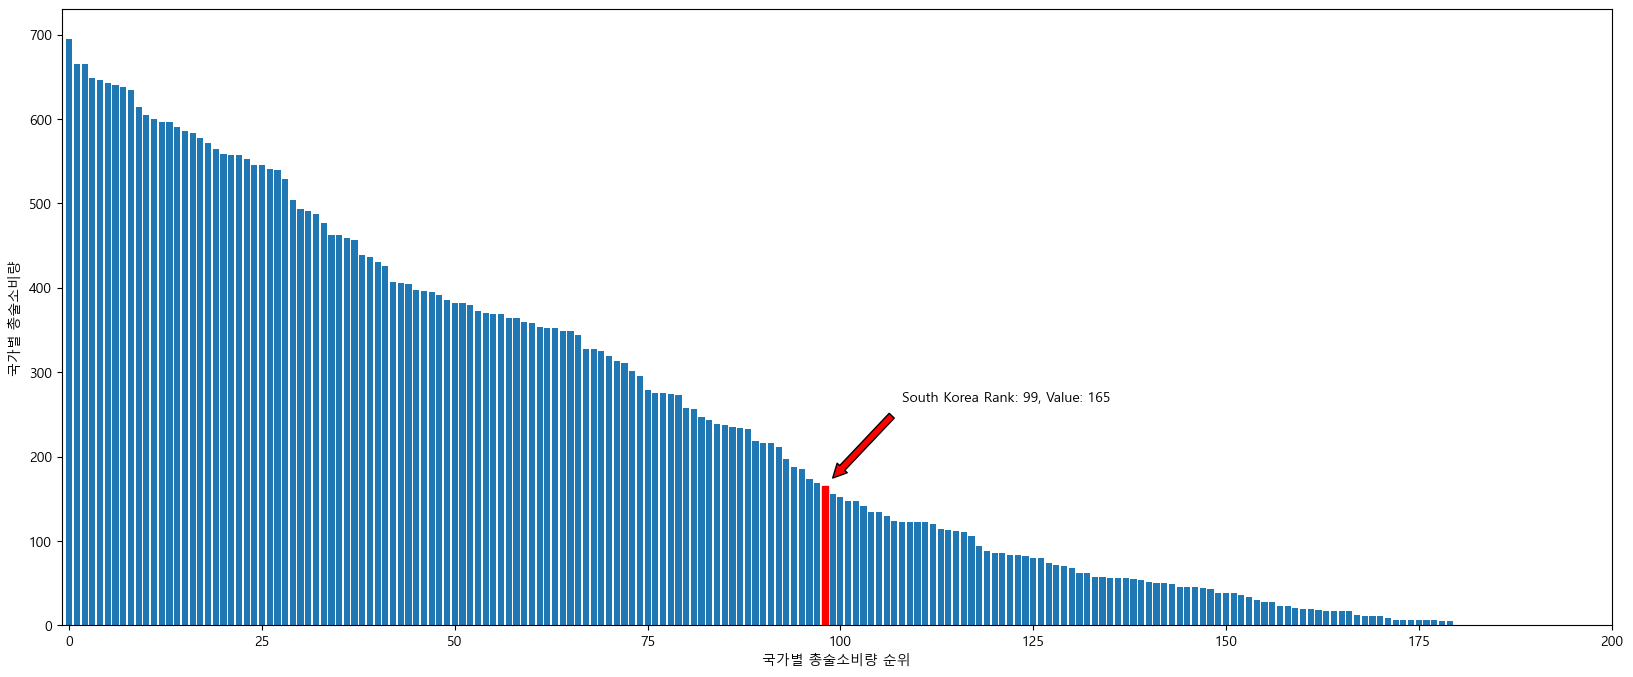

In [120]:
# x축에는 인덱스를 대입
x=df.index
y=df["총술소비량"]

# South Korea의 인덱스를 변수에 저장
flag=df["국가"]=="South Korea"
korea_index=df.loc[flag].index[0]

# South Korea의 총술소비량의 value를 변수에 저장
korea_value=df.loc[korea_index, "총술소비량"]

plt.figure(figsize=(20,8))
graph=plt.bar(x,y)
graph[korea_index].set_color("r")

# 주석을 추가
plt.annotate(
    f"South Korea Rank: {korea_index+1}, Value: {korea_value}",
    # 인덱스가 0부터 시작하므로, 실제 랭크는 +1

    xy=(korea_index, korea_value), #주석(화살표)의 시작점
    xytext=(korea_index+10, korea_value+100), # 주석(텍스트) 위치
    # 화살표 설정
    arrowprops={
        "facecolor":"r",
        "edgecolor":"k",
        "headwidth":10, # 머리 넓이
        "headlength":10, # 머리 길이
        "width":5, # 기둥 넓이
        "shrink":0.1
    }
)

# x 축의 이름
plt.xlabel("국가별 총술소비량 순위")

# y 축의 이름
plt.ylabel("국가별 총술소비량")

# x 축의 범위를 지정
plt.xlim(-1, 200)

plt.show()


1. drinks 데이터프레임 복사본 생성
2. 도수를 기준으로 내림차순 정렬
3. 인덱스를 초기화하고 기존의 인덱스는 제거
4. South Korea의 인덱스 값을 변수에 저장
5. South Korea의 도수 값을 변수에 저장
6. 위 그래프와 같이 막대그래프를 생성하고 주석을 추가

In [121]:
df2=drinks.copy()

In [124]:
df2.sort_values("도수", ascending=False, inplace=True)
# case2. df2["랭크"]=df2["도수"].rank(ascending=False)

In [127]:
df2.reset_index(drop=True, inplace=True)

In [130]:
flag2=df2["국가"]=="South Korea"
korea_index2=df2.loc[flag2].index[0]
korea_index2

np.int64(14)

In [132]:
korea_value2=df2.loc[korea_index2,"도수"]
korea_value2

np.float64(5.94)

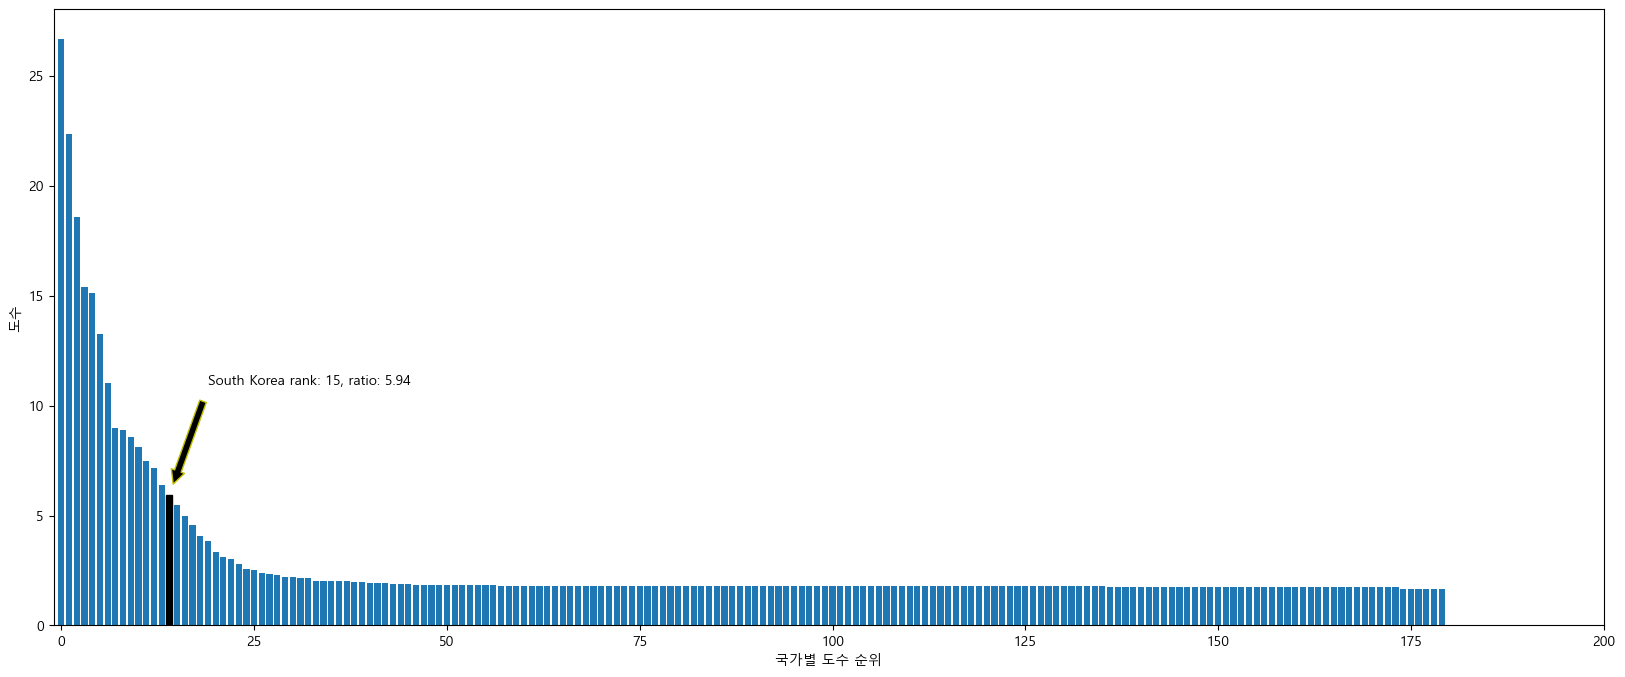

In [143]:
x=df2.index
y=df2["도수"]

plt.figure(figsize=(20,8))
graph2=plt.bar(x,y)
graph2[korea_index2].set_color("k")

plt.annotate(
    f"South Korea rank: {korea_index2+1}, ratio: {korea_value2}",
    xy=(korea_index2, korea_value2),
    xytext=(korea_index2+5, korea_value2+5),
    arrowprops={
        "facecolor":"k",
        "edgecolor":"y",
        "headwidth":10,
        "headlength":10,
        "width":5,
        "shrink":0.1
    }
)

# x 축의 이름
plt.xlabel("국가별 도수 순위")

# y 축의 이름
plt.ylabel("도수")

# x 축의 범위 지정
plt.xlim(-1,200)

plt.show()